# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.



Dataset yang digunakan berasal dari Kaggle: **[Indonesian Food and Drink Nutrition Dataset](https://www.kaggle.com/datasets/anasfikrihanif/indonesian-food-and-drink-nutrition-dataset/data)**

Berisi kolom:
- `calories`
- `proteins`
- `fat`
- `carbohydrate`
- `name`
- `images`

Data ini memberikan wawasan tentang pengukuran jumlah nutrisi yang masuk ke dalam tubuh saat mengonsumsi makanan dan minuman Indonesia


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import  silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('../nutrition.csv')
df.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.describe()

,id,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,673.500000,203.217385,10.001189,7.584027,25.390193
std,388.701042,163.075430,11.847980,13.733063,32.193054
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,337.250000,75.000000,1.800000,0.500000,4.525000
50%,673.500000,146.000000,5.000000,2.000000,13.300000
75%,1009.750000,333.750000,15.000000,8.275000,37.575000
max,1346.000000,940.000000,83.000000,100.000000,647.000000


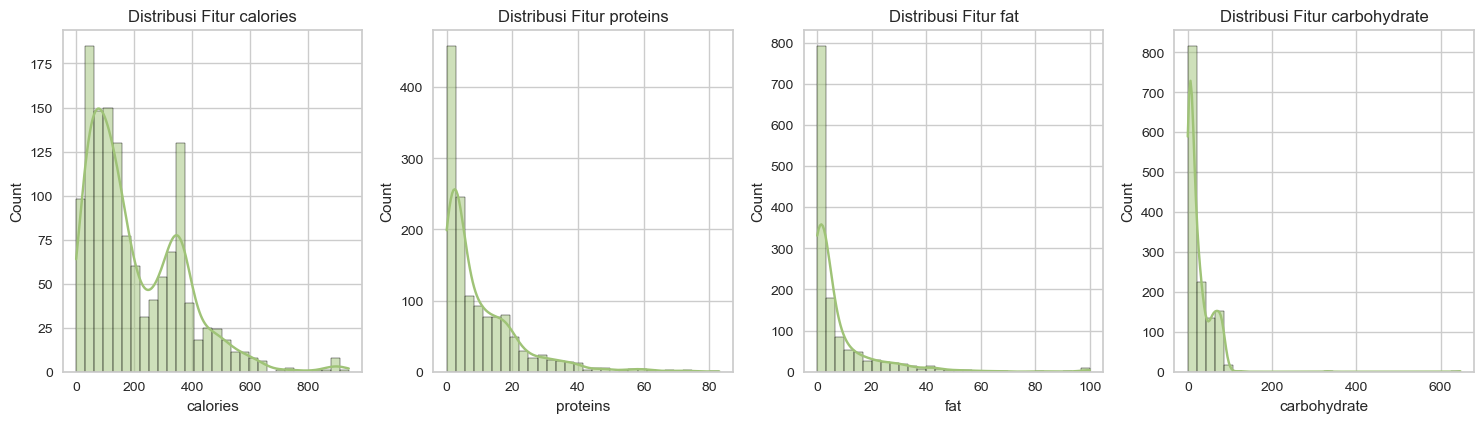

In [ ]:
# Histogram Plot
df_col_num = df.select_dtypes(include='float64')

plt.figure(figsize=(15,8))
for i, col in enumerate(df_col_num.columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='g')
    plt.title(f'Distribusi Fitur {col}')
plt.tight_layout()
plt.show()

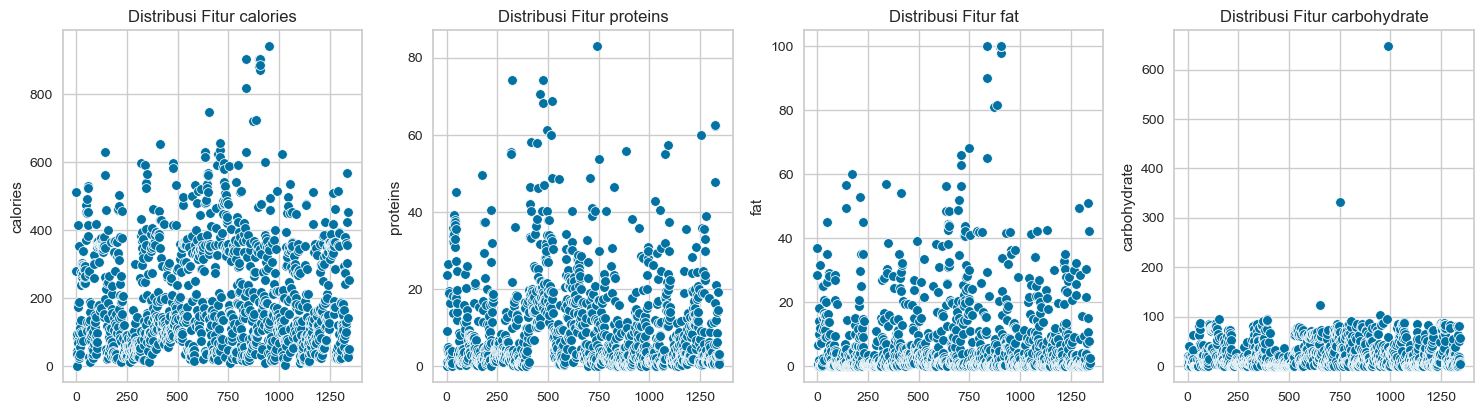

In [ ]:
# Scatter Plot
plt.figure(figsize=(15,8))
for i, col in enumerate(df_col_num.columns, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(df[col])
    plt.title(f'Distribusi Fitur {col}')
plt.tight_layout()
plt.show()

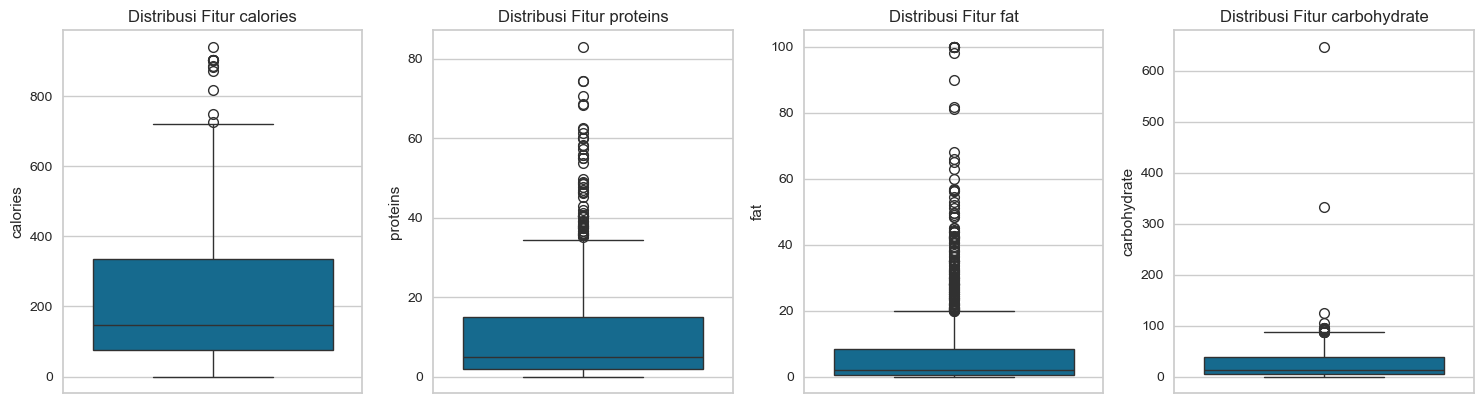

In [ ]:
# Box Plot
plt.figure(figsize=(15,8))
for i, col in enumerate(df_col_num.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Distribusi Fitur {col}')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# menghapus fitur yg tidak perlu
df.drop(columns = {'id','image'}, inplace=True)

In [ ]:
# mengecek missing value
df_col_num.isna().any()

calories        False
proteins        False
fat             False
carbohydrate    False
dtype: bool

In [ ]:
df_col_category = df.select_dtypes(include='object')

# melihat data yg duplicate di fitur name
df_col_category.duplicated().any()

np.False_

## Normalization

Dikarenakan nilai outliers yang ada adalah nilai-nilai valid dalam dataset nutrisi (bukan kesalahan pengukuran), jadi saya melakukan normalisasi MinMaxScaler daripada menghapusnya.

In [ ]:
df_col_num = df.select_dtypes(include='float64')

In [ ]:
# memanggill fungsi MinMaxScaler
min_max_scaler = MinMaxScaler()

scaled_min_max = min_max_scaler.fit_transform(df_col_num)
df_clean = pd.DataFrame(scaled_min_max, columns=['calories', 'proteins', 'fat', 'carbohydrate'])
df_clean.head()

,calories,proteins,fat,carbohydrate
0,0.297872,0.110843,0.284,0.000000
1,0.545745,0.285542,0.370,0.032921
2,0.000000,0.000000,0.002,0.000000
3,0.047872,0.013253,0.004,0.016692
4,0.039362,0.053012,0.005,0.005873


In [ ]:
df_clean.to_csv('nutrition_preprocessing.csv')